# Logistic Regression Classification 

- Binary classification yapar (0 ya da 1, kedi ya da köpek vb..)
- Binary classification en küçük neural network 

# Computation Graph 

- Matematiksel ifadeleri görselleştirmek için kullanılan bir yöntem.
- örneğin c= a^2 + b^2'nin karekökünü aşağıdaki gibi görselleştirebiliriz.

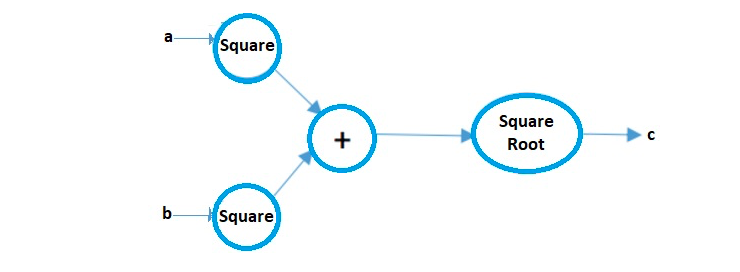

In [1]:
from IPython.display import Image
Image(filename='/Users/bestecetin/Desktop/machine_learning/courses/machinelearning/Classification/LogisticRegressionClassification/foto/b.png') 

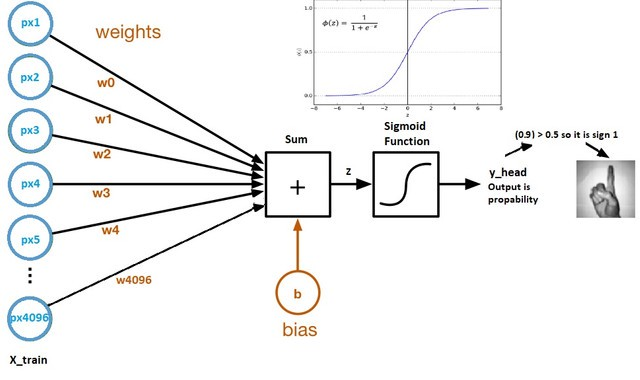

In [2]:
Image(filename='/Users/bestecetin/Desktop/machine_learning/courses/machinelearning/Classification/LogisticRegressionClassification/foto/m.jpeg') 

- Parametreler ağırlık ve bias.
- Weights(Ağırlık): her pikselin coefficient'ı
- Bias: intercept (kesişim)
- z = (w.t)x + b => z eşittir (transpose of weights times input x) + bias
- Başka bir değişle => z = b + px1w1 + px2w2 + ... + px4096*w4096
- y_head(predict ettiğim değer) = sigmoid(z)

- Sigmoid Function aktivasyon fonksiyonu olarak geçer. 
- Sayımızı 0 ila 1 arasına eşitler. 
- Bu da benim outputumun olasılıksal bir değer olmasını sağlar.
- Output'a bir treshold değeri verirsem 0.4'ten büyükse 1 değilse 0 label'ına eşit oluyor.

- Neden Sigmoid Function kullandık ?
- Çünkü olasılıksal bir sonuç verir. 
- Türevi alınabilen bir fonksiyon, bu da weight ve bias değerlerimizi güncellememizi sağlıyor.

# Initializing Parameters

Bu örnek için weight 0.01 seçildi bias'lar ise 0 

# Forward Propagation

- Pixellerden cost fonksiyona kadar olan tüm adımlara forward propagation diyoruz.
- z =  (w.t)x + b
- ve z'yi sigmoid fonksiyonun icine koyup bir y_head ile olasılıksal bir deger elde ediyoruz.
-  log loss(error) function asagidaki gibidir:

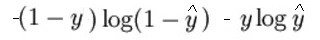

In [3]:
Image(filename='/Users/bestecetin/Desktop/machine_learning/courses/machinelearning/Classification/LogisticRegressionClassification/foto/duzeltme.jpeg') 

- Cost function ise benim loss function degerlerimin toplamidir. 

- Yani önce z degeri hesaplanır, sonra z sigmoid function'a sokulur bir y_head degeri elde edilir daha sonra y ve y_head degerleri'ni loss function'a sokup bir deger elde ettim.
- Daha sonra yukaridaki tum adimlari baska bir degerle yeniden yaptım ve yine bir loss function degeri elde ettim
- Son adım olarak loss functionları toplayarak bir cost fonction degeri elde ettim.
- Bu sürecin tamamı forward propagation olarak gecer.

Yukarıdaki adımları for ile yapabiliriz fakat bu yavaş olacaktır. Eğer tüm degerlerimi bir matrisin icine alıp tek bir cost degeri elde ederim eger yuksek cikarsa modelin iyi olmadigini anlayip agirlik ve bias degerlerimi güncellemem gerekiyor.


	Şimdi ise cost fonksiyonundan bahsedilecek. Z değeri hesaplandıktan sonra z sigmoid fonksiyona sokulur ve y_head değeri hesaplanır. Y ve y_head değerleri bir loss function’a sokulur. Her değer için bu işlemler tekrarlanır. Son olarak loss function’lar toplanır ve cost fonction yani maliyet fonksiyonu hesaplanmış olur. Bu değer yüksek çıkarsa benim z değerini hesaplarken kullandığım weight ve bias değerlerimin güncellenmesi gerekir. Z değeri hesaplamaktan cost fonksiyonunu bulmaya kadar geçen süreye ise forward propagation denir.  
- Cost’un weight ve bias’a bağlı olduğundan bahsedilmişti.  Cost’u azaltmak için bunların update edilmesi gerekir. 


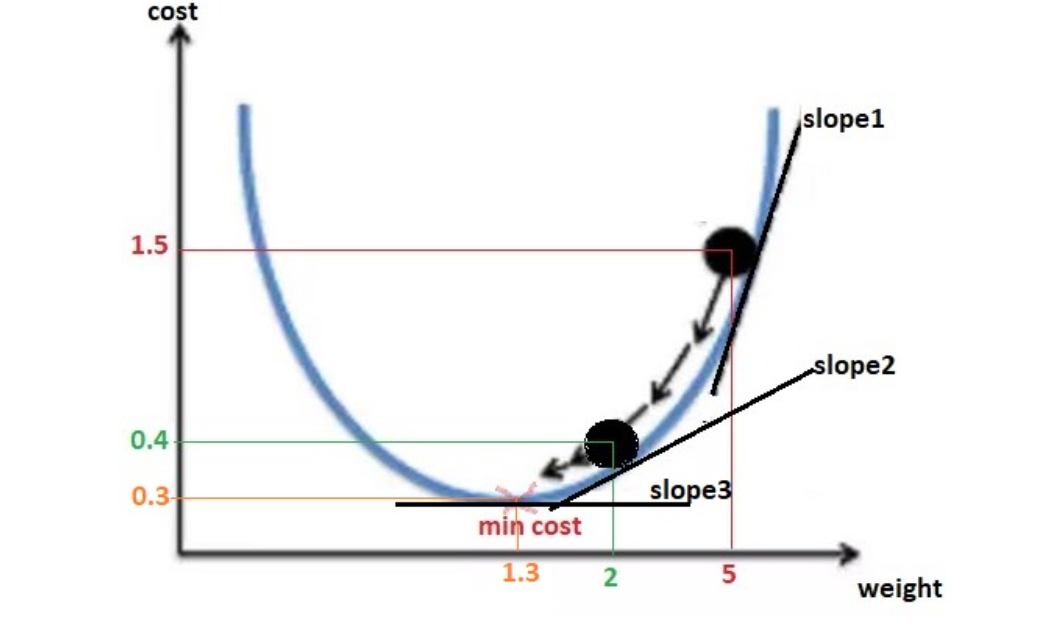

In [4]:
Image(filename='/Users/bestecetin/Desktop/machine_learning/courses/machinelearning/Classification/LogisticRegressionClassification/foto/cost.png') 

- Yukarıdaki fotoğrafta benim w yani ağırlığım 5 ve bunun cost’taki karşılığı 1.5, şuan minumum değil ve aşağı doğru giderek weight’i azaltmamız gerekiyor,bu şekilde minimum cost’a ulaşabilirim. 
- W=w-step yapacağız step ise bizim için slope’dur. Slope ise eğim demektir. 5’e 1.5 olan noktanın , cost fonksiyonunu dik kestiği line, bu noktanın bu fonksiyona göre eğimi yani slope’udur.
- Slope1=3 ise yeni w değeri w=5-3’ten 2 olur. Tekrardan forward propagation yapacak olursak, slope2=0.7 ise yeni w değeri w=2-0.7’den w=1.3 olur. Yeniden forward propagation yapılır ve slope3=0.01 ise w=1.29 çıkar neredeyse 1.3’e eşit olduğu neredeyse değişme olmadığı için minumum noktaya ulaştığımı düşünürüm. 


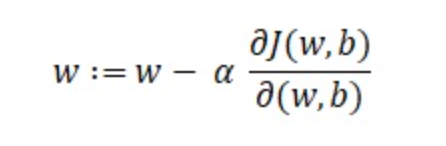

In [5]:
Image(filename='/Users/bestecetin/Desktop/machine_learning/courses/machinelearning/Classification/LogisticRegressionClassification/foto/c.png') 

- İse formülümüzdür. 
- Aslında yapılan işlem türevini almaktır.
- W,b ise weight ve bias demektir. Weight için anlatılan her şey bias için de geçerlidir. 
- a ise learning rate ya da öğrenme oranı, öğrenme hızı olarak geçer. Çok küçük bir değer olması durumunda öğrenme çok yavaş olur büyük olması durumunda ise minimum olan değeri kaçırıp çok başka bir değere zıplamış olabiliriz bu yüzden ne çok küçün ne de çok büyük olması gerekir. 
- Learnin rate hyperparameter’dir. Yani bir değer verilir ve sonra bu değer değiştire, değiştire deneyerek ayarlanacak demektir.  

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [7]:
df=pd.read_csv("/Users/bestecetin/Desktop/machine_learning/courses/machinelearning/Classification/LogisticRegressionClassification/data/data.csv")

- import ettiğimiz data kanserin iyi huylu mu kötü huylu mu oldugunu söylüyor.
- m harfi kötü huylu tumor 
- b harfi ise iyi huylu tumor

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [9]:
df.drop(["Unnamed: 32","id"],axis=1,inplace=True) #burada axis=1 sutunu drop etmek demek, inplace kalıcı olmasını sagliyordu.

- istenmeyen, kullanılmayacak degeler drop edildi.

In [10]:
df.head() #ile kontrol ettik

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


diagnosis ile işlem yapabilmemiz için M Ya da B olarak değil 0 ya da 1 olarak değiştirmek istiyoruz.

In [11]:
df.diagnosis=[ 1 if each =="M" else 0 for each in df.diagnosis]

In [12]:
df.info() # ile kontrol

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    int64  
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

diagnosis'in int oldugunu görüyoruz önceden object'ti. 

In [13]:
y = df.diagnosis.values #values np.array'e çevirmek için

In [14]:
x_data = df.drop(["diagnosis"],axis=1) #bunlar feature'larım

- Bazı feature'daki degerlerim digerlerine göre cok yuksek veya dusuk rakamli bu yuzden birinin digerine göre daha onemliymis gibi algilanmamasi icin scale edecegim yani normalizasyon uygulayacagim

In [15]:
#normalizasyon
x=(x_data-np.min(x_data)) / (np.max(x_data)-np.min(x_data)).values

In [16]:
x

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,0.521037,0.022658,0.545989,0.363733,0.593753,0.792037,0.703140,0.731113,0.686364,0.605518,...,0.620776,0.141525,0.668310,0.450698,0.601136,0.619292,0.568610,0.912027,0.598462,0.418864
1,0.643144,0.272574,0.615783,0.501591,0.289880,0.181768,0.203608,0.348757,0.379798,0.141323,...,0.606901,0.303571,0.539818,0.435214,0.347553,0.154563,0.192971,0.639175,0.233590,0.222878
2,0.601496,0.390260,0.595743,0.449417,0.514309,0.431017,0.462512,0.635686,0.509596,0.211247,...,0.556386,0.360075,0.508442,0.374508,0.483590,0.385375,0.359744,0.835052,0.403706,0.213433
3,0.210090,0.360839,0.233501,0.102906,0.811321,0.811361,0.565604,0.522863,0.776263,1.000000,...,0.248310,0.385928,0.241347,0.094008,0.915472,0.814012,0.548642,0.884880,1.000000,0.773711
4,0.629893,0.156578,0.630986,0.489290,0.430351,0.347893,0.463918,0.518390,0.378283,0.186816,...,0.519744,0.123934,0.506948,0.341575,0.437364,0.172415,0.319489,0.558419,0.157500,0.142595
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,0.690000,0.428813,0.678668,0.566490,0.526948,0.296055,0.571462,0.690358,0.336364,0.132056,...,0.623266,0.383262,0.576174,0.452664,0.461137,0.178527,0.328035,0.761512,0.097575,0.105667
565,0.622320,0.626987,0.604036,0.474019,0.407782,0.257714,0.337395,0.486630,0.349495,0.113100,...,0.560655,0.699094,0.520892,0.379915,0.300007,0.159997,0.256789,0.559450,0.198502,0.074315
566,0.455251,0.621238,0.445788,0.303118,0.288165,0.254340,0.216753,0.263519,0.267677,0.137321,...,0.393099,0.589019,0.379949,0.230731,0.282177,0.273705,0.271805,0.487285,0.128721,0.151909
567,0.644564,0.663510,0.665538,0.475716,0.588336,0.790197,0.823336,0.755467,0.675253,0.425442,...,0.633582,0.730277,0.668310,0.402035,0.619626,0.815758,0.749760,0.910653,0.497142,0.452315


artik tum degerlerim 0 ile 1 arasinda scale edildi.

normalizasyon formulu = (x - min(x)) / (max(x) - min(x))

- train test split ise veri setinin bir kısmını test için diğer kısmının ise egitim icin kullanilmasidir.
- Ornegin: %80'ini egitim icin kullanıp buldugun sonucların dogru olup olmadigini test etmek amaciyla %2o'sini test kismi olarak ayırıp train ettiklerimin dogrulugunu test edebilirim

In [17]:
#train test split 
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.20, random_state=42)

- x feature'larım y ise label'larım.
- test_size = 0.2 demek %20'si test için ayrılsın %80'i ise train icin ayrilsin demek
- x'in %80'i x_train, x'in %20'si x_test
- y'nin %80'i y_train, y'in %20'si y_test

train_test_split data'yı random olarak boler fakat random_state her run ettigimizde aynı degerleri test aynı degerleri train olarak boler.

In [18]:
x_train = x_train.T 
x_test  = x_test.T 
y_train = y_train.T. 
y_test  = y_test.T

Burada ise row ve column'ların yerlerini degistirdik

In [19]:
print("x_train: ",x_train.shape)
print("x_test: ",x_test.shape)
print("y_train: ",y_train.shape)
print("y_test: ",y_test.shape)

x_train:  (30, 455)
x_test:  (30, 114)
y_train:  (455,)
y_test:  (114,)


In [20]:
#parametreleri initialize etmek
def initialize_weights_and_bias(dimension):
    w = np.full((dimension,1),0.01)
    b = 0.0
    return w,b 

In [21]:
w,b = initialize_weights_and_bias(30)

In [22]:
w

array([[0.01],
       [0.01],
       [0.01],
       [0.01],
       [0.01],
       [0.01],
       [0.01],
       [0.01],
       [0.01],
       [0.01],
       [0.01],
       [0.01],
       [0.01],
       [0.01],
       [0.01],
       [0.01],
       [0.01],
       [0.01],
       [0.01],
       [0.01],
       [0.01],
       [0.01],
       [0.01],
       [0.01],
       [0.01],
       [0.01],
       [0.01],
       [0.01],
       [0.01],
       [0.01]])

- Goruldugu gibi bu yazdıgımız method ile w ve b değerlerini initial ediyoruz. Methoda verdigimiz deger kaç adet degerimiz varsa o olacak o kadar 0.01 yani weight ile çarpılacağı için x degeri icin x,1 shape'e sahip 0.01 iceren bir matris oluşturuyoruz.
- Mesela 30 yazarsak 30 adet 0.01 iceren bir sutuna(30,1) sahip olacağız demektir.
- Bias degerimizi ise 0.0 olarak initial ettik yani 0.

In [23]:
#sigmoid function 
def sigmoid(z):
    y_head = 1/(1+np.exp(-z))
    return y_head

In [24]:
sigmoid(0)

0.5

In [25]:
sigmoid(6)

0.9975273768433653

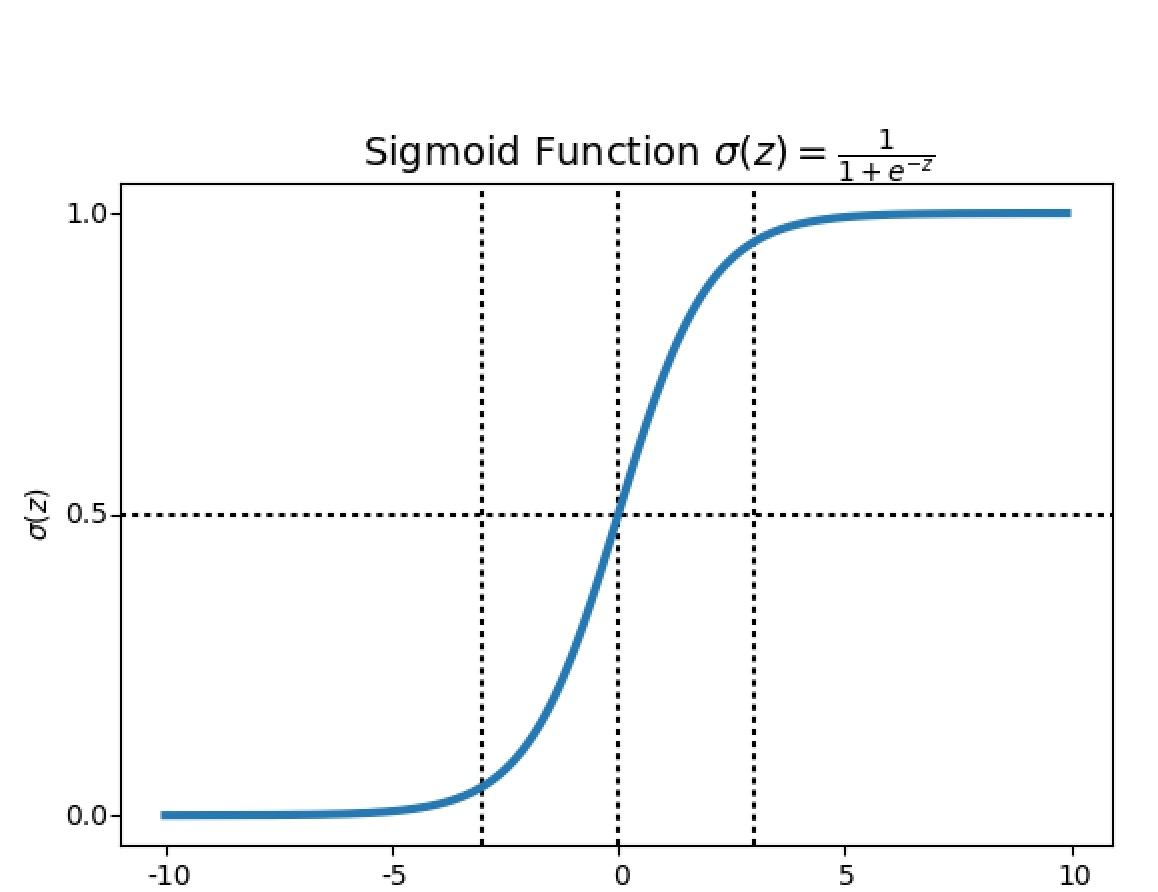

In [26]:
Image(filename='/Users/bestecetin/Desktop/machine_learning/courses/machinelearning/Classification/LogisticRegressionClassification/foto/si.jpg') 

- Yukarıdaki gibi sigmoid fonksiyonun formulunu methodumuza yazdik. Ve grafikteki gibi 0 noktasında 0.5 degeri vermesini bekledik ki öyle de oldu.

In [27]:
def forward_backward_propagation(w,b,x_train,y_train):
    # forward propagation
    z = np.dot(w.T,x_train) + b 
    y_head = sigmoid(z)
    loss = -y_train*np.log(y_head)-(1-y_train)*np.log(1-y_head)
    cost = (np.sum(loss))/x_train.shape[1]      # x_train.shape[1]  is for scaling
    
    # backward propagation
    derivative_weight = (np.dot(x_train,((y_head-y_train).T)))/x_train.shape[1] # x_train.shape[1]  is for scaling
    derivative_bias = np.sum(y_head-y_train)/x_train.shape[1]                 # x_train.shape[1]  is for scaling
    gradients = {"derivative_weight": derivative_weight, "derivative_bias": derivative_bias}
    
    return cost,gradients

 forward propagation:
- np.dot carpma icin kullanilir.
- w.T yapma sebebimiz ise (1,30)'luk bir matrisi verimizle çarpacağız verimiz (x_train)(30,455) boyutunda bir matris bunları carpamayiz fakat bunu (1,30) * (30,455) şeklinde çarpabiliriz o zaman sonuc (1,455) cıkar bunun icin w.T yaparak transpose'unu aldık.
- z degeri hesaplandiktan sonra degerimizi sigmoid function'a soktuk bir y_head elde ettik.
- Daha sonra loss function'u yazmamız gerekecek ve loss hesaplanacak.
- Loss'ların toplamı bize cost'u verecekti daha sonra hepsini np.sum ile toplayıp x_train.shape[1]'e (yani 455) bolmusuz ve cost hesaplandi.

backward propagation
- cost hesaplandıktan sonra slope'larimi, ne kadar guncelleme yapacagimi buldum. (henuz w = w - slope yapmadim yani) 
- daha sonra cost ve gradients return edildi
- gradient'in icinde agirliklarim ve bias degerlerim bir dictionary olarak depolandi.

Şimdi weight, bias'ı update edip cost'u guncelleyen kodu yazacagiz:

In [28]:
def update(w, b, x_train, y_train, learning_rate,number_of_iterarion):
    cost_list = []
    cost_list2 = []
    index = []
    
    # updating(learning) parameters is number_of_iterarion times
    for i in range(number_of_iterarion):
        # make forward and backward propagation and find cost and gradients
        cost,gradients = forward_backward_propagation(w,b,x_train,y_train)
        cost_list.append(cost)
        # lets update
        w = w - learning_rate * gradients["derivative_weight"]
        b = b - learning_rate * gradients["derivative_bias"]
        if i % 10 == 0:
            cost_list2.append(cost)
            index.append(i)
            print ("Cost after iteration %i: %f" %(i, cost))
            
    # we update(learn) parameters weights and bias
    parameters = {"weight": w,"bias": b}
    plt.plot(index,cost_list2)
    plt.xticks(index,rotation='vertical')
    plt.xlabel("Number of Iterarion")
    plt.ylabel("Cost")
    plt.show()
    return parameters, gradients, cost_list


- Öncelikle update etmek için bize guncelleyecegimiz weight, bias degerleri, forward ve backward propagation'u x defa yapacagimiz icin x_train(input) ve y_train(label) degerleri, bir learning rate degeri lazım yani slope'u hangi hızda ögrendigim deger, number_of_iterarion ise kaç kez bacward ve forward yapacagim degerlerim lazim
- for ile kaç kez forward, backward'ı kac kez yapacagımızı soylemis olduk
- daha onceden yazdigim  forward_backward_propagation methodu kullanarak cost ve gradients degerlerimi return ettirdim.
- update icin w = w - learning_rate * gradients ile w = w - learning_rate * wieght'in cost'a göre turevi yani yukarıda anlattilan formül uygulandi. Aynı bias için de yapıldı.
- her 10 adımda bir cost'u bir diziye kaydediyoruz.
- number_of_iterarion degerlerini deneyerek, w ve b degerlerinin 0'a yaklastigi degerleri sececegim.

In [29]:
# prediction
def predict(w,b,x_test):
    # x_test is a input for forward propagation
    z = sigmoid(np.dot(w.T,x_test)+b)
    Y_prediction = np.zeros((1,x_test.shape[1]))
    # if z is bigger than 0.5, our prediction is sign one (y_head=1),
    # if z is smaller than 0.5, our prediction is sign zero (y_head=0),
    for i in range(z.shape[1]):
        if z[0,i]<= 0.5:
            Y_prediction[0,i] = 0
        else:
            Y_prediction[0,i] = 1

    return Y_prediction

- prediction islemi icin bize weight, bias ve predict edecegim x_test datası lazim bunlari test edip kac tanesi yii kac tanesi kotu huylu tumor prediction yapacagiz. 
- (1,144) zerolardan olusan bir y_prediction olusturuyorum.
- bunu 0.5'ten kucukse 0 degilse 1 ile for dongusu yardımıyla dolduruyorum.

Şimdi logistic regresyon methodumuzu yazıp yaptıklarımızı birlestirelim

Cost after iteration 0: 0.692977
Cost after iteration 10: 0.499667
Cost after iteration 20: 0.406616
Cost after iteration 30: 0.351936
Cost after iteration 40: 0.315762
Cost after iteration 50: 0.289862
Cost after iteration 60: 0.270257
Cost after iteration 70: 0.254795
Cost after iteration 80: 0.242214
Cost after iteration 90: 0.231722
Cost after iteration 100: 0.222796
Cost after iteration 110: 0.215080
Cost after iteration 120: 0.208317
Cost after iteration 130: 0.202324
Cost after iteration 140: 0.196961
Cost after iteration 150: 0.192121
Cost after iteration 160: 0.187722
Cost after iteration 170: 0.183698
Cost after iteration 180: 0.179997
Cost after iteration 190: 0.176577
Cost after iteration 200: 0.173402
Cost after iteration 210: 0.170443
Cost after iteration 220: 0.167676
Cost after iteration 230: 0.165080
Cost after iteration 240: 0.162638
Cost after iteration 250: 0.160334
Cost after iteration 260: 0.158155
Cost after iteration 270: 0.156091
Cost after iteration 280: 0.154

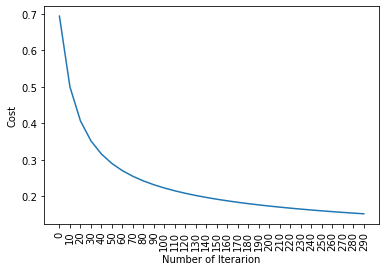

test accuracy: 96.49122807017544 %


In [30]:
# %% logistic_regression
def logistic_regression(x_train, y_train, x_test, y_test, learning_rate ,  num_iterations):
    # initialize
    dimension =  x_train.shape[0]  # that is 30
    w,b = initialize_weights_and_bias(dimension)
    # do not change learning rate
    parameters, gradients, cost_list = update(w, b, x_train, y_train, learning_rate,num_iterations)
    
    y_prediction_test = predict(parameters["weight"],parameters["bias"],x_test)

    # Print test Errors
    print("test accuracy: {} %".format(100 - np.mean(np.abs(y_prediction_test - y_test)) * 100))
    
logistic_regression(x_train, y_train, x_test, y_test,learning_rate = 1, num_iterations = 300)    

learning_rate: parametlerimi ne hızda güncelleyeceğim. <br>
num_iteration: her forward ve backward yaptığımda bu değer 1 artar. Bu değer weight ve bias için önemliydi, weight ve bias'ı öğrenebilmemiz için önemlidir. <br>
dimension: 30 adet verim olduğu için 30'a eşitledim. <br>
update: methodunda forward ve backward propagation zaten var o yüzden onu çağırarak optimum weight, bias değerlerini oradan aldık.<br>

In [31]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(x_train.T,y_train.T)
print("test accuracy {}".format(lr.score(x_test.T,y_test.T)))

test accuracy 0.9824561403508771
